In [1]:
# DO NOT EDIT THIS CELL
# ADD IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = "all"

# GML Mini-Challenge 2 - HS 2024

**Ausgabe:** Montag, 11. November 2024

**Abgabe:** Montag, 8. Dezember 2024, 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  
- **Bitte löschen, kopieren, duplizieren, splitten und verschieben Sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**


**Bei der Defense am Ende des Semesters werden wir deinen Code betrachten und besprechen. Überlege dir, welche Zeilen du kommentieren möchtest, damit du bei der Defense einfach rekunstrieren kannst, was dir bei der Umsetzung überlegt hast.**


### Module

Neben den Python-Basismodulen darfst du die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm` (für Progress-Bars).

Du darfst auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module darfst du nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Mika macht am Zentrum für Reisemedizin (ZRM) in Zürich ein Praktikum. Das ZRM hat viele Patienten mit exotischen Krankheiten. Die Krankehiten müssen mit einem Bluttest diagnostiziert werden. Da es einen beachtlichen Katalog von möglichen Krankheiten gibt, möchte man möglichst genau einschränken können, welche Krankeit bei einem Patienten vorliegt. Mit dieser Information kann man direkt auf die wahrscheinlichsten Krankheiten testen und muss nicht gleich auf alle Krankheiten testen. Jeder Patient am ZRM muss einen Fragebogen bezüglich Symptomen ausfüllen. Anhand dieser Liste wird dann auf Krankheiten getestet. Mika hat die Aufgabe bekommen diesen Prozess zu optimieren und mit Machine Learning vorherzusagen, welche Krankheit bei einem Patient vorliegen könnte. Dazu hat das ZRM Mika einen Datensatz von ehemaligen Patienten vorgelegt.

Es ist das Ziel aus den Symptomen die `Diagnose` möglichst akkurat vorherzusagen. Insbesondere möchte man die korrekte Krankheit entdecken, indem man nicht mehr als 3 Tests ausführt. Folgende Daten liegen vor:


| Spalte                    | Beschreibung            |
|------------------------------|-------------------------|
| id                           | Patienten ID      |
| plötzliches_Fieber           | Binäre Variable         |
| Kopfschmerzen                | Binäre Variable         |
| Mundbluten                   | Binäre Variable         |
| Nasenbluten                  | Binäre Variable         |
| Muskelschmerzen              | Binäre Variable         |
| Gelenkschmerzen              | Binäre Variable         |
| Erbrechen                    | Binäre Variable         |
| Ausschlag                    | Binäre Variable         |
| Durchfall                    | Binäre Variable         |
| Hypotonie                    | Binäre Variable         |
| Pleuraerguss                 | Binäre Variable         |
| Aszites                      | Binäre Variable         |
| gastrointestinale_Blutung    | Binäre Variable         |
| Schwellung                   | Binäre Variable         |
| Übelkeit                     | Binäre Variable         |
| Schüttelfrost                | Binäre Variable         |
| Myalgie                      | Binäre Variable         |
| Verdauungsprobleme           | Binäre Variable         |
| Müdigkeit                    | Binäre Variable         |
| Hautläsionen                 | Binäre Variable         |
| Bauchschmerzen               | Binäre Variable         |
| Augenhöhlenschmerzen         | Binäre Variable         |
| Nackenschmerzen              | Binäre Variable         |
| Schwäche                     | Binäre Variable         |
| Rückenschmerzen              | Binäre Variable         |
| Gewichtsverlust              | Binäre Variable         |
| Zahnfleischbluten            | Binäre Variable         |
| Gelbsucht                    | Binäre Variable         |
| Koma                         | Binäre Variable         |
| Schwindel                    | Binäre Variable         |
| Entzündung                   | Binäre Variable         |
| rote_Augen                   | Binäre Variable         |
| Appetitverlust               | Binäre Variable         |
| Harninkontinenz              | Binäre Variable         |
| langsame_Herzfrequenz        | Binäre Variable         |
| Lichtempfindlichkeit         | Binäre Variable         |
| gelbe_Haut                   | Binäre Variable         |
| gelbe_Augen                  | Binäre Variable         |
| Gesichtsverzerrung           | Binäre Variable         |
| Mikrozephalie                | Binäre Variable         |
| Rigor                        | Binäre Variable         |
| bittere_Zunge                | Binäre Variable         |
| Krampfanfall                 | Binäre Variable         |
| Anämie                       | Binäre Variable         |
| Coca-Cola-farbener_Urin      | Binäre Variable         |
| Hypoglykämie                 | Binäre Variable         |
| Prostration                  | Binäre Variable         |
| Hyperpyrexie                 | Binäre Variable         |
| steifer_Nacken               | Binäre Variable         |
| Reizbarkeit                  | Binäre Variable         |
| Verwirrtheit                 | Binäre Variable         |
| Zittern                      | Binäre Variable         |
| Lähmung                      | Binäre Variable         |
| Lymphschwellungen            | Binäre Variable         |
| Atembeschränkung             | Binäre Variable         |
| Zehenentzündung              | Binäre Variable         |
| Fingerentzündung             | Binäre Variable         |
| Lippenreizung                | Binäre Variable         |
| Juckreiz                     | Binäre Variable         |
| Geschwüre                    | Binäre Variable         |
| Zehennagelverlust            | Binäre Variable         |
| Sprachproblem                | Binäre Variable         |
| Bullseye_Ausschlag           | Binäre Variable         |
| Diagnose                    | Die diagnostizierte Krankheit|



## Aufgabe 1 (4 Punkte)

In dieser Aufgabe ist es das Ziel den Datensatz `./diagnose_train.csv` einzulesen, kennenzulernen und erste Erkenntnisse zu diskutieren.


### Aufgabe 1a

Visualisiere und / oder zeige wichtige Kennzahlen über den Datensatz.

Da es viele Variablen sind verwende eine kompakte Darstellung der Daten. Überlege dir was im Kontext dieser Daten und Fragestellung sinnvollerweise dargestellt werden kann.

In [2]:
import pandas as pd

data_train = pd.read_csv('diagnose_train.csv')
data_train.head()

,id,plötzliches_Fieber,Kopfschmerzen,Mundbluten,Nasenbluten,Muskelschmerzen,Gelenkschmerzen,Erbrechen,Ausschlag,Durchfall,...,Atembeschränkung,Zehenentzündung,Fingerentzündung,Lippenreizung,Juckreiz,Geschwüre,Zehennagelverlust,Sprachproblem,Bullseye_Ausschlag,Diagnose
0,328,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
1,539,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,433,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
3,525,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japanese_encephalitis
4,94,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japanese_encephalitis


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 15 Häufigste Symptome')

Text(0.5, 0, 'Symptome')

Text(0, 0.5, 'Anzahl der Fälle')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Muskelschmerzen'),
  Text(1, 0, 'plötzliches_Fieber'),
  Text(2, 0, 'Nasenbluten'),
  Text(3, 0, 'Ausschlag'),
  Text(4, 0, 'gelbe_Haut'),
  Text(5, 0, 'Lichtempfindlichkeit'),
  Text(6, 0, 'Erbrechen'),
  Text(7, 0, 'Appetitverlust'),
  Text(8, 0, 'Gelenkschmerzen'),
  Text(9, 0, 'Bauchschmerzen.1'),
  Text(10, 0, 'Mundbluten'),
  Text(11, 0, 'Kopfschmerzen'),
  Text(12, 0, 'Harninkontinenz'),
  Text(13, 0, 'gelbe_Augen'),
  Text(14, 0, 'Schwäche')])

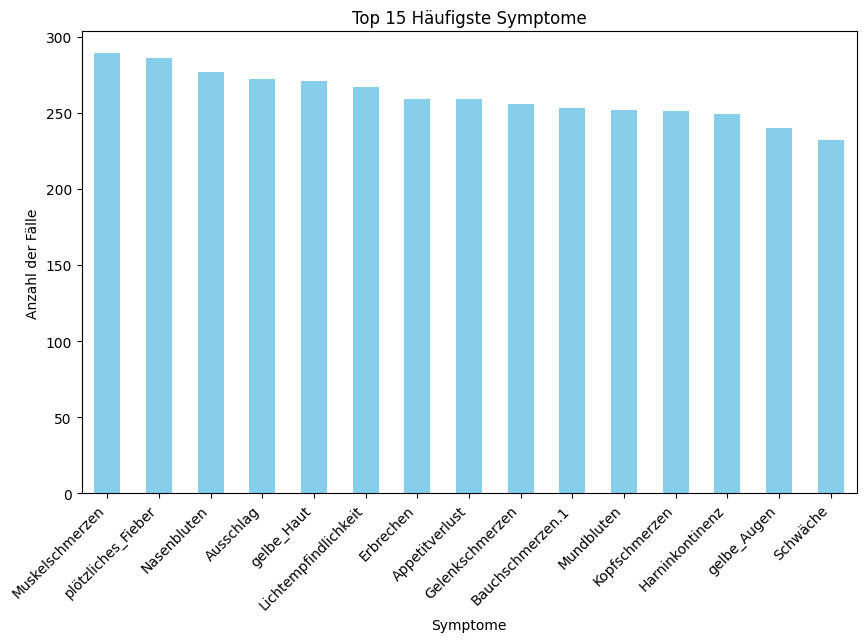

In [3]:
# meisten Symptome
import numpy as np
import matplotlib.pyplot as plt

symptom_counts = data_train.drop('id', axis=1).select_dtypes(include=[np.number]).sum()
top_15_symptoms = symptom_counts.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
top_15_symptoms.plot(kind='bar', color='skyblue')
plt.title("Top 15 Häufigste Symptome")
plt.xlabel("Symptome")
plt.ylabel("Anzahl der Fälle")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Diagnose'>

Text(0.5, 1.0, 'Alle Diagnosen')

Text(0.5, 0, 'Diagnosen')

Text(0, 0.5, 'Anzahl der Fälle')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'West_Nile_fever'),
  Text(1, 0, 'Japanese_encephalitis'),
  Text(2, 0, 'Tungiasis'),
  Text(3, 0, 'Rift_Valley_fever'),
  Text(4, 0, 'Chikungunya'),
  Text(5, 0, 'Dengue'),
  Text(6, 0, 'Yellow_Fever'),
  Text(7, 0, 'Zika'),
  Text(8, 0, 'Plague'),
  Text(9, 0, 'Lyme_disease'),
  Text(10, 0, 'Malaria')])

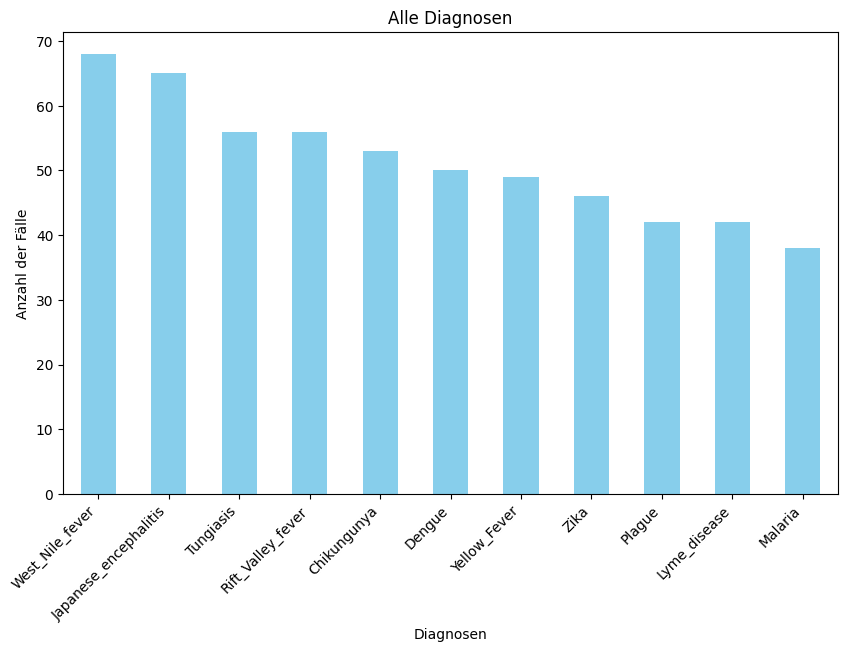

In [4]:
# meisten Diagnosen
diagnosis_counts = data_train['Diagnose'].value_counts()
top_15_diagnoses = diagnosis_counts.head(15)

plt.figure(figsize=(10, 6))
top_15_diagnoses.plot(kind='bar', color='skyblue')
plt.title("Alle Diagnosen")
plt.xlabel("Diagnosen")
plt.ylabel("Anzahl der Fälle")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Korrelation mit Diagnose')

Text(0.5, 1.0, 'Top 10 Symptome nach Korrelation mit Diagnose')

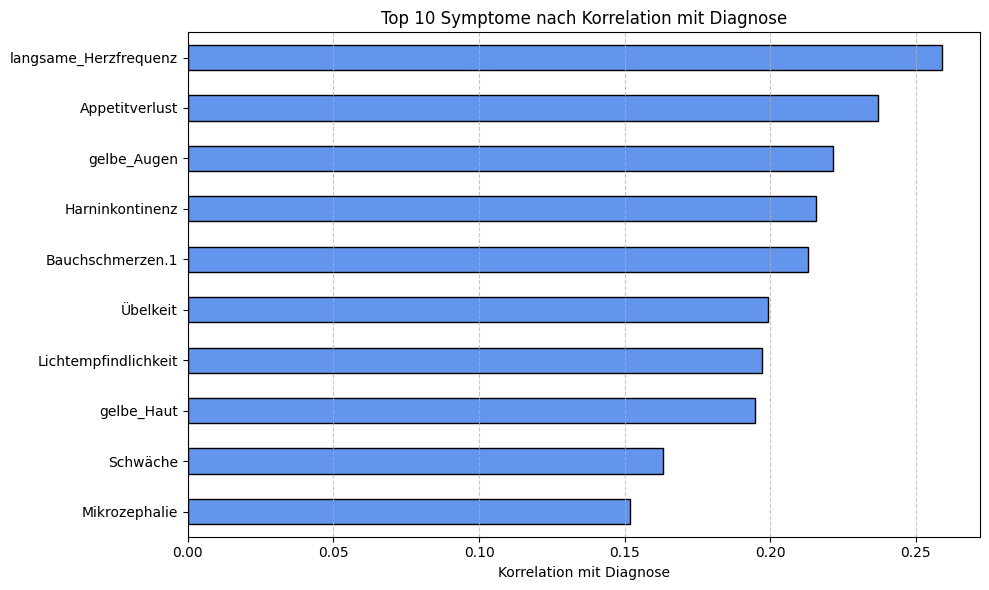

In [5]:
# welche Diagnosen korrellieren am meisten
from sklearn.preprocessing import LabelEncoder

data_train['Diagnose_encoded'] = LabelEncoder().fit_transform(data_train['Diagnose'])
correlation_with_diagnosis = data_train.drop(columns=['id', 'Diagnose', 'Diagnose_encoded']).corrwith(data_train['Diagnose_encoded']).abs()
top_symptoms_by_correlation = correlation_with_diagnosis.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_symptoms_by_correlation.plot(kind='barh', color='cornflowerblue', edgecolor='black')
plt.xlabel("Korrelation mit Diagnose")
plt.title("Top 10 Symptome nach Korrelation mit Diagnose")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unser Ziel ist es die `Diagnose` vorherzusagen unter Verwendung der anderen Variablen.  

Was lässt sich über dieses Vorhaben sagen? Diskutiere deine Einsichten.


Es gibt 11 verschiedene Diagnosen mit 64 verschiednen Symptomen.

Die Symptome mit höheren Korrelationswerten, wie eine langsame Herzfrequenz oder Appetitverlust werden vermutlich einen signifikanten Beitrag zum Vorhersagemodell leisten. Diese Symptome könnten dem Modell helfen, die Diagnose besser zu differenzieren, da sie spezifischere Hinweise zur Klassifikation geben.

## Aufgabe 2 (18 Punkte)

Implementieren Sie den Aufbau und die algorithmische Funktionsweise eines *Multilayer Perceptrons*. Folgende Vorgaben sollen erfüllt werden:

- Das MLP soll ein _Multi-Class Classification_ Problem mit $k$ Klassen modellieren können.
- Vollständige Konfigurierbarkeit: Architektur (# layers / # units per layer), Regularisierung ($\lambda$), Learning Rate ($\eta$)
- Aktivierungsfunktion in Hidden-Layers ist $ReLU$
- Initialisiere die Gewichte zufällig mit kleinen Werten, z.B. aus dem Intervall $[-0.7, 0.7]$. 
- Reproduzierbarkeit: Setze _random seeds_ um die Initialisierung der Gewichte reproduzierbar zu machen [siehe numpy](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).
- Erstelle / ergänze die bereitgestellten Klassen. Du kannst auch neue Methoden oder Argumente hinzufügen.
- score() soll die Accuracy berechnen.
- Die Operationen müssen vektorisiert implementiert werden.
- Implementiere das Modell gemäss sklearn-API.


Es soll folgende Kostenfunktion $J$ minimiert werden (_negative log likelihood_ / _cross-entropy_ mit Regularisierung):

\begin{align}
J(\theta) &= \frac{1}{n}\sum_{i=1}^{n} \sum_{j=1}^{k} \Big(- y_j^{(i)} \log \hat{y}_j^{(i)} \Big) + C \\
C &= \frac{\lambda}{2} \sum_{l=1}^{L} \sum_{i=1}^{u^{(l-1)}} \sum_{j=1}^{u^{(l)}} (\mathbf{W}^{(l)}_{ij})^2
\end{align}

Im folgenden einige Hinweise.

#### Notation

- $n$: Anzahl Datenpunkte
- $L$: Anzahl Layer (ohne Input-Layer)
- $k$: Anzahl Klassen
- $p$: Anzahl Input Features
- $\lambda$: Regularisierungsfaktor
- $\mathbf{a}^{(l)}$ Aktivierungen im Layer $l$ (l=0 ist Input-Layer)
- $\mathbf{z}^{(l)}$ pre-activations / logits im Layer $l$
- $\mathbf{y}^{(i)} \in \{0, 1\}$: One-hot encoded Vektor mit Dimensionalität $\mathbb{R}^k$,  Eintrag 1 indiziert die Klassenzugehörigkeit
- $\hat{y}_k^{(i)}$ Prediction für Klasse $k$, $P(Y=k| x^{(i)})$ 
- $w^{(l)}_{ij}$: Gewicht / Parameter $ij$ von Layer $l$
- $W^{(l)}$ Parameter von Layer $l$ mit $\in \mathbb{R}^{u^{(l-1)} \times u^{(l)}}$
- $b^{(l)}$ Bias Term von Layer $l$ mit $\in \mathbb{R}^{u^{(l)}}$
- $u^{(l)}$: Anzahl Nodes (units) im Layer $l$
- $g()$: Aktivierungsfunktion

#### Struktur eines MLPs

Als Layer bezeichnet man die Kombination aus linearer Transformation und Aktivierungsfunktion: 
\begin{align}
\mathbf{a}^{(l)} &= g\big(\mathbf{a}^{(l-1)T}W^{(l)}  + b^{(l)}\big) 
\end{align}

Hidden-Layers sind dabei Layer die weder direkt mit Input noch Output verbunden sind. Als Input-Layer bezeichnet man die Daten selbst. Als Output-Layer bezeichnet man den letzten Layer.


![Neural Network](nn.png)


#### Forward Pass

Als forward pass bezeichnet man das Prozessieren eines / mehrerer Datenpunkte vom Input zum Output.

Exemplarisch für einen Datenpunk $\mathbf{x}^{(i)}$.

\begin{align*}
\mathbf{a}^{(0)} &= \mathbf{x}^{(i)} \\
\mathbf{z}^{(1)} &= \mathbf{a}^{(0)T}W^{(1)} + b^{(1)T} \\
\mathbf{a}^{(1)} &= g(\mathbf{z}^{(1)})\\
.. &= .. \\
\mathbf{z}^{(l)} &= \mathbf{a}^{(l-1)T}W^{(l)}  + b^{(l)T} \\
\mathbf{a}^{(l)} &= g(\mathbf{z}^{(l)}) \\
.. &= .. \\
\mathbf{\hat{y}}_k^{(i)} &= a_k^{(L)} 
\end{align*}

Wobei:

\begin{align*}
g(\mathbf{z}^{(l)}) &=  \text{ReLU}(z^{(l)}) & \text{ReLU Aktivierungsfunktion für Hidden-Layers } (l \lt L)  \\
a_i^{(L)} &=  \text{softmax}(z^{(l)})  & \text{ Softmax-Funktion for } l = L
\end{align*}

#### Backpropagation

Backpropagation ist der zentrale Algorithmus beim Trainieren von neuronalen Netzwerken um die partiellen Ableitung der Loss-Funktion bezüglich der Parameter zu berechnen. Dabei wird der Gradient der Loss-Funktion $\nabla_{\theta} J$ vom Output des Netzwerkes mit Hilfe der Kettenregel zurückpropagiert. Sie sollten diesen Algorithmus anwenden um alle $\frac{\partial J}{\partial \mathbf{w_{ij}^{(l)}}}$ sowie $\frac{\partial J}{\partial \mathbf{b_{j}^{(l)}}}$ zu bestimmen. Folgende Zusammenhänge sind hilfreich bei der Implementation und zeigen die Situation bei $n=1$.

\begin{align*}
\frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}} &= \begin{cases}
1, & \text{where } \mathbf{z}^{(l)} \gt 0 \\
0, & \text{where } \mathbf{z}^{(l)} \leq 0
\end{cases} & \text{for } l \lt L \text{ if } g(x)=\text{ReLU}\\
\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{a}^{(l-1)}} &= \mathbf{W}^{(l)} \\
\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{w}^{(l)}} &= \mathbf{a}_i^{(l-1)}
\end{align*}


Man kann den Gradienten der Kostenfunktion bezüglich der Gewichte $W$ rekursiv bestimmen:

\begin{align*}
\frac{\partial J}{\partial \mathbf{z}^{(L)}} = \frac{\partial J}{\partial \mathbf{a}^{(L)}} &= \delta^{(L)} = \mathbf{\hat{y}} - \mathbf{y} & \text{initialize back-prop with this}\\
\frac{\partial J}{\partial \mathbf{a}^{(l-1)}}  = \delta^{(l-1)} &= \Big( \delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}} \Big) \Big(\frac{\partial \mathbf{z}^{(l)}}{\partial \mathbf{a}^{(l-1)}}\Big)^T & \text{for backpropagation}\\
\frac{\partial J}{\partial \mathbf{W}^{(l)}} &=  \big(\frac{\partial \mathbf{z}^{(l)}}{\partial W^{(l)}}\big)^T \big(\delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}}\big)  & \text{gradients for the weights, this is what we want!} \\
\frac{\partial J}{\partial \mathbf{b}^{(l)}} &=  \big(\delta^{(l)} \odot \frac{\partial \mathbf{a}^{(l)}}{\partial \mathbf{z}^{(l)}}\big)   & \text{gradients for the biases, this is what we want!}
\end{align*}


Die analytische Herleitung des Algorithmus sprengt den Rahmen hier. Wenn du aber mehr dazu lesen möchten, findest du eine gute Herleitung hier:

- [CS229 Stanford](https://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf)

Zum Thema Backpropagation gibt es ausserdem ausgezeichnete Videos:

- [3Blue1Brown Video 1](https://youtu.be/IHZwWFHWa-w)

- [3Blue1Brown Video 2](https://youtu.be/Ilg3gGewQ5U)



#### Vektorisierung

Wir können den Forward-Pass und die Backpropagation effizient berechnen, indem wir die Operationen vektorisieren. Wir berechnen die Aktivierungen direkt für alle $n$ Datenpunkte. Auch die Backpropagation lässt sich vektorisieren, wir berechnen dann **_den mittleren Gradienten_** über alle Datenpunkte. Ohne Vektorisierung wird ihre Implementation zu langsam sein. Hier der Ablauf für die Forward-Propagation:


\begin{align*}
\mathbf{X} & \in \mathbb{R}^{n \times p} \\
\mathbf{A}^{(l)} & \in \mathbb{R}^{n \times u_{l}} \\
\mathbf{W}^{(l)} & \in \mathbb{R}^{u_{l-1} \times u_{l}} \\
\mathbf{b}^{(l)} & \in \mathbb{R}^{u_{l} \times 1}
\end{align*}

Allgemein formuliert wäre das:

\begin{align*}
\mathbf{Z}^{(l-1)} &= \mathbf{A}^{(l-1)} \mathbf{W}^{(l)} + \mathbf{b}^{(l)T} \\
\mathbf{A}^{(l)} &= g( \mathbf{Z}^{(l-1)})
\end{align*}

Wobei $\mathbf{A}^{(0)} = \mathbf{X}$.


### Aufgabe 2a

Als erstes implementierst du verschiedene Python-Klassen, die Komponenten / Module in unserem MLP repräsentieren. Diese Vorgehensweise ist angelehnt an _Deep Learning Frameworks_, wie z.B. `PyTorch`. Wie immer, werden wir danach einen `sklearn`-kompatiblen _Estimator_ implementieren.
Vervollständige die folgenden Klassen:

- ReluActivation
- LinearLayer
- Softmax

Die `forward()` Methode definiert jeweils die _Forward Propagation_ durch die entsprechende Operation.

Die `backward()` Methode definiert jeweils die _Backpropagation_ durch den entsprechenden Operation.


Die Ableitung der ReLU kannst folgendermassen implementieren:

\begin{equation}
\frac{d \text{ReLU}(x)}{d x} = \begin{cases}
1, & \text{if } x \gt 0 \\
0, & \text{if } x \leq 0
\end{cases}
\end{equation}


Für Softmax gilt:

- `backward()`: soll den Gradienten der _negative loglikelihood_ Kostenfunktion $\frac{\partial J}{\partial \mathbf{z}^{(l)}} = \text{softmax}(\mathbf{z}^{(l)}) - \mathbf{y}$ ausgeben. Damit wir _backpropagation_ gestartet.
- Implementiere eine nummerisch stabile Version von Softmax. Lese dazu folgenden Abschnitt: [Link](https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html#numerical-stability-of-softmax)


In [6]:
from typing import Type, List, Tuple

class Module:
    """Defines a component of a Neural Network."""
    
    def __init__(self):
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Forward Pass."""
        raise NotImplementedError

    def backward(self, x: np.ndarray) -> np.ndarray:
        """Backpropagation."""
        raise NotImplementedError

class ReluActivation(Module):
    """ReLU Activation Function."""
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        """Applies the ReLU activation function."""
        self.input = x
        return np.maximum(0, x)
    
    def backward(self, upstream_grad: np.ndarray) -> np.ndarray:
        """Backpropagation for ReLU."""
        relu_grad = (self.input > 0)
        return upstream_grad * relu_grad

class DenseLayer(Module):
    """Dense Layer that applies a linear transformation."""
    
    def __init__(self, num_inputs: int, 
                 num_units: int, 
                 learning_rate: float = 0.01, 
                 theta_init_range: Tuple[float, float] = (-0.7, 0.7),
                 alpha: float = 0.0):
        """
        Initializes the Dense Layer with input and output dimensions.
        
        Args:
            num_inputs (int): Number of input features.
            num_units (int): Number of output units.
            learning_rate (float): Learning rate for gradient updates (default: 0.01).
            theta_init_range (Tuple[float, float]): Range for initializing weights.
            alpha (float): L2 regularization strength (default: 0.0).
        """
        low, high = theta_init_range
        self.weights_ = np.random.uniform(low, high, (num_inputs, num_units))
        self.biases_ = np.zeros((1, num_units), dtype=np.float64)
        self.input = None 
        self.learning_rate = learning_rate
        self.alpha = alpha  # L2 regularization strength

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Forward pass for the dense layer.
        
        Args:
            x (np.ndarray): Input data of shape (n_samples, num_inputs).
        
        Returns:
            np.ndarray: Output data of shape (n_samples, num_units).
        """
        self.input = x
        return x @ self.weights_ + self.biases_
    
    def backward(self, upstream_grad: np.ndarray) -> np.ndarray:
        """
        Backward pass for the dense layer.
        
        Args:
            upstream_grad (np.ndarray): Gradient from the upstream layer.
        
        Returns:
            np.ndarray: Gradient with respect to the inputs.
        """
        # Gradient with respect to inputs
        grad_input = upstream_grad @ self.weights_.T
        
        # Gradients with respect to weights and biases
        grad_weights = (self.input.T @ upstream_grad / self.input.shape[0]) + self.alpha * self.weights_
        grad_biases = np.mean(upstream_grad, axis=0, keepdims=True)
        
        # Update weights and biases
        self.weights_ -= self.learning_rate * grad_weights
        self.biases_ -= self.learning_rate * grad_biases
        
        return grad_input


class Softmax(Module):
    """Softmax Activation Function for output layer."""
    
    def __init__(self):
        self.output = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Forward pass for the softmax layer.
        
        Args:
            x (np.ndarray): Input data of shape (n_samples, num_classes).
        
        Returns:
            np.ndarray: Softmax probabilities of shape (n_samples, num_classes).
        """
        max_x = np.max(x, axis=1, keepdims=True) 
        exp_x = np.exp(x - max_x)
        self.output = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return self.output
    
    def backward(self, y_true: np.ndarray) -> np.ndarray:
        """
        Backward pass for the softmax layer with cross-entropy loss.
        
        Args:
            y_true (np.ndarray): One-hot encoded true labels of shape (n_samples, num_classes).
        
        Returns:
            np.ndarray: Gradient with respect to the inputs of shape (n_samples, num_classes).
        """
        return self.output - y_true


### Aufgabe 2b

Die folgende Zelle definiert einige Tests. Berechne jeweils die Outputs Ihrer Komponenten auf Basis der vorgegebenen Parameter und Inputs. Speichere die Outputs in den entsprechenden Variablen ab.

Du darfst grundsätzlich alles anpassen, damit die Tests für ihre Implementation durchgeführt werden können (z.B.  Biases in _Weights Matrix_ integriert oder andere Argumente / Outputs ihrer Methoden). Geprüft werden nur die folgenden Outputs / Variablen:

- `dense_layer_forward_actual`: $\mathbf{Z}^{(l)} \in \mathbb{R}^{n \times u_l}$
- `dense_layer_delta_actual`: $\delta^{(l-1)} \in \mathbb{R}^{n \times u_{(l-1)}}$
- `softmax_output_actual`: $\hat{\mathbf{Y}} \in \mathbb{R}^{n \times k}$
- `softmax_delta_actual`: $\delta^{(L)} \in \mathbb{R}^{n \times k}$


In [7]:
####################################
# Dense Layer - Test forward()
####################################

# Inputs and Layer Parameters
# (2 input neurons, 2 output neurons, 2 biases)
dense_layer_weights = np.array([[1, 2], [1, 2]], dtype=np.float64).reshape(2, 2)
dense_layer_biases = np.array([8, 2], dtype=np.float64).reshape(1, 2)
dense_layer_input_activations = np.array([[0, 8]]).reshape(1, 2)

# Adapt the following lines according to your implementation
dense = DenseLayer(num_inputs=2, num_units=1)
dense.weights_ = dense_layer_weights
dense.biases_ = dense_layer_biases
dense_layer_forward_actual = dense.forward(dense_layer_input_activations)

# the variable "dense_layer_forward_actual" will be tested - shape (n, num_output_neurons)


####################################
# Dense Layer - Test backward()
####################################

# Inputs and Layer Parameters
# (2 input neurons, 2 output neurons, 2 biases)

dense_layer_weights = np.array([[1, 2], [1, 2]], dtype=np.float64).reshape(2, 2)
dense_layer_biases = np.array([8, 2], dtype=np.float64).reshape(1, 2)
dense_layer_input_activations = np.array([[0, 8]], dtype=np.float64).reshape(1, 2)
dense_layer_delta_upstream = np.array([[0.12, -0.12]], dtype=np.float64).reshape(1, 2)

# Adapt the following lines according to your implementation
dense = DenseLayer(num_inputs=2, num_units=1)
dense.weights_ = dense_layer_weights
dense.biases_ = dense_layer_biases
x_output = dense.forward(dense_layer_input_activations)
dense_layer_delta_actual = dense.backward(dense_layer_delta_upstream)

# the variable "dense_layer_delta_actual" will be tested - shape (n, num_output_neurons)


####################################
# Softmax - Test forward()
####################################

# Inputs (n, num_classes)
softmax_input = np.array([[16, 18]]).reshape(1, 2)

# Adapt the following lines according to your implementation
softmax = Softmax()
softmax_output_actual = softmax.forward(softmax_input)

# the variable "softmax_output_actual" will be tested - shape (n, num_classes)


####################################
# Softmax - Test backward()
####################################

# Inputs (n, num_classes)
y_true = np.array([[0, 1]]).reshape(1, 2)
softmax_input = np.array([[16, 18]]).reshape(1, 2)

# Adapt the following lines according to your implementation
softmax = Softmax()
softmax_forward = softmax.forward(softmax_input)
softmax_delta_actual = softmax.backward(y_true)

# the variable "softmax_delta_actuall" will be tested - shape (n, num_classes)

Die folgende Zelle enthält die Tests. Ändere diese nicht!

In [8]:
import traceback 

dense_layer_forward_expected = np.array([[16, 18]])
try:
    np.testing.assert_equal(dense_layer_forward_actual, dense_layer_forward_expected)
except AssertionError:
    print(f"Dense Forward Test Failed")
    traceback.print_exc()


dense_layer_delta_expected = np.array([[-0.12, -0.12]])
try:
    np.testing.assert_equal(dense_layer_delta_actual, dense_layer_delta_expected)
except AssertionError:
    print(f"Dense Backward Test Failed")
    traceback.print_exc()
    

softmax_output_expected = np.array([[0.12, 0.88]])

try:
    np.testing.assert_almost_equal(
        softmax_output_actual, softmax_output_expected, decimal=3
    )
except AssertionError:
    print(f"Softmax forward failed")
    traceback.print_exc()
    

softmax_delta_expected = np.array([[0.12, -0.12]])
try:
    np.testing.assert_almost_equal(softmax_delta_actual, softmax_delta_expected, decimal=3)
except AssertionError:
    print(f"Softmax backward failed")
    traceback.print_exc()

### Aufgabe 2c

Vervollständige die Klasse `MLPClassifier`. Benutze Objekte der Klassen `ReluActivation`, `DenseLayer` und `Softmax` um das Netzwerk zu implementieren, sowie deren `forward()` und `backward()` Methoden für Forward Propagation und Backpropagation. Durch die Verwendung von `ClassifierMixin` musst du `score()` nicht selber implementieren.

Die folgenden Argumente der `__init__` Methode musst Sie nicht implementieren, bzw. in einer späteren Aufgabe:

- `batch_size`
- `suppress_output`
- `save_activations`

In [9]:
import copy
from collections import defaultdict

from sklearn.base import BaseEstimator, ClassifierMixin
from tqdm.notebook import tqdm
tqdm.monitor_interval = 0

class MLPClassifier(BaseEstimator, ClassifierMixin):
    """
    Multi-Layer Perceptron für die Klassifikation.

    Args:
    -----
        num_input_neurons: Anzahl der Eingangsneuronen (Anzahl der Merkmale: p)
        num_hidden_neurons: Liste mit der Anzahl der Neuronen in den versteckten Schichten (l < L)
        num_output_neurons: Anzahl der Neuronen in der Ausgabeschicht (l = L)
        activation_function: Die Aktivierungsfunktion in den versteckten Schichten, eine Modulklasse
        lr: Lernrate
        alpha: L2-Regularisierungsstärke (lambda)
        max_num_steps: Maximale Anzahl von Schritten, nach denen die Optimierung beendet wird
        theta_init_range: Der Bereich, auf dem die Gewichte zufällig initialisiert werden
        seed: Zufallsseed für Reproduzierbarkeit
    """
    def __init__(
        self,
        num_input_neurons: int,
        num_hidden_neurons: list[int],
        num_output_neurons: int,
        activation_function: Type[Module],
        lr: float = 0.001,
        alpha: float = 0.0,
        max_num_steps: int = 1000,
        theta_init_range: Tuple[float, float] = (-0.7, 0.7),
        seed: int = 123,
        save_activations: bool = False,
        class_weights: np.ndarray = None
    ):
        self.num_input_neurons = num_input_neurons
        self.num_hidden_neurons = num_hidden_neurons
        self.num_output_neurons = num_output_neurons
        self.activation_function = activation_function
        self.lr = lr
        self.alpha = alpha
        self.max_num_steps = max_num_steps
        self.theta_init_range = theta_init_range
        self.seed = seed
        self.save_activations = save_activations

        self.costs_ = []
        self._initialize_network()
        self.classes_ = None
        class_weights: np.ndarray = None
        self.class_weights = class_weights 

    def _initialize_network(self):
        np.random.seed(self.seed)
        self.layers = []
        layer_sizes = [self.num_input_neurons] + self.num_hidden_neurons + [self.num_output_neurons]
        for i in range(len(layer_sizes) - 1):
            self.layers.append(
                DenseLayer(
                    num_inputs=layer_sizes[i],
                    num_units=layer_sizes[i + 1],
                    learning_rate=self.lr,
                    theta_init_range=self.theta_init_range,
                    alpha=self.alpha  # L2-Regularisierung
                )
            )
            if i < len(layer_sizes) - 2:
                self.layers.append(self.activation_function())
        self.layers.append(Softmax())


    def fit(self, X: np.ndarray, y: np.ndarray):
        y_onehot = np.eye(self.num_output_neurons)[y]
        self.classes_ = np.unique(y)

        # Reset activations storage
        if self.save_activations:
            self.activations = []

        for step in tqdm(range(self.max_num_steps)):
            # Forward
            x = X
            step_activations = []

            for layer in self.layers:
                x = layer.forward(x)
                if self.save_activations:
                    step_activations.append(x.copy())

            if self.save_activations:
                self.activations.append(np.hstack(step_activations))

            # Compute loss
            loss = self.calculate_cost(y_onehot, x)
            self.costs_.append(loss)

            # Backward
            upstream_grad = self.layers[-1].backward(y_onehot)
            for layer in reversed(self.layers[:-1]):
                upstream_grad = layer.backward(upstream_grad)

        return self

    def calculate_cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """
        Berechnet die Kosten der negativen Log-Likelihood mit L2-Regularisierung und Klassen-Gewichtung.

        Args:
            y_true: (n_samples, n_classes) - One-Hot-Encoded Labels
            y_pred: (n_samples, n_classes) - Softmax Wahrscheinlichkeiten

        Returns:
            float: Gesamtkosten
        """
        if self.class_weights is not None:
            weights = self.class_weights[np.argmax(y_true, axis=1)]
            weighted_loss = -np.mean(weights * np.sum(y_true * np.log(y_pred + 1e-15), axis=1))
        else:
            weighted_loss = -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))

        # L2-Regularisierung
        l2_cost = 0.0
        for layer in self.layers:
            if isinstance(layer, DenseLayer):
                l2_cost += np.sum(np.square(layer.weights_))
        l2_cost = (self.alpha / 2) * l2_cost

        return weighted_loss + l2_cost



    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Alle Klassenwahrscheinlichkeiten pro Beispiel.

        Args:
        -----
            X: (n_samples, n_features)

        Returns:
        --------
            (n_samples, n_classes)
        """
        x = X
        for layer in self.layers:
            x = layer.forward(x)
        return x


    def predict(self, X: np.ndarray) -> np.ndarray:
        """Gibt die wahrscheinlichste Klasse pro Beispiel zurück.

        Args:
        -----
            X: (n_samples, n_features)

        Returns:
        --------
            (n_samples, )
        """
        probabilities = self.predict_proba(X)
        predictions = np.argmax(probabilities, axis=1)
        return self.classes_[predictions]

### Aufgabe 2d

Zeige anhand des kleinen Entwicklungsdatensatzes (`dev_data.csv`), dass deine Implementierung funktioniert, indem du die Output-Variable $y \in \{0, 1, 2\}$ anhand der Input-Variablen $\mathbf{x} = \left(x_1, x_2\right)$ vorhersagen können.  
Erzeuge dazu ein Netzwerk mit 2 Hidden Layern mit 30 und 20 Units/Nodes und optimiere die Modell-Koeffizienten, bis der Wert der Kostenfunktion sichtbar stagniert. 

Berechne und printe für das trainierte Modell:

- die Accuracy auf dem Datensatz mit `score()`
- den Wert der Kostenfunktion mit `calculate_cost()`
- die Wahrscheinlichkeiten für alle Klassen für die **ersten 10 Beobachtungen** mit `predict_proba()`
- die Vorhersage für die **ersten 10 Beobachtungen** mit `predict()`

Zeichne:

- die Entwicklung der Kostenfunktion über das Gradient Descent Verfahren hinweg (Learning Curve)
- die Confusion Matrix

Du darfst `sklearn.metrics.confusion_matrix` und `sklearn.metrics.ConfusionMatrixDisplay` verwenden.

In [10]:
dev_data = pd.read_csv('dev_data.csv')

X = dev_data[['x1', 'x2']].values
y = dev_data['y'].values

mlp_dev = MLPClassifier(
    num_input_neurons=2,
    num_hidden_neurons=[30, 20],
    num_output_neurons=3,
    activation_function=ReluActivation,
    lr = 0.1,
)

mlp_dev.fit(X, y)

# accuracy
print(f"Accuracy: {np.mean(mlp_dev.predict(X) == y)}")

# cost
print(f"Final Cost: {mlp_dev.costs_[-1]}")

# first 10 predictions
print(mlp_dev.predict_proba(X[:10]))

print(mlp_dev.predict(X[:10]))

  0%|          | 0/1000 [00:00<?, ?it/s]

MLPClassifier(activation_function=<class '__main__.ReluActivation'>, lr=0.1,
              num_hidden_neurons=[30, 20], num_input_neurons=2,
              num_output_neurons=3)

Accuracy: 0.898
Final Cost: 0.2609799871381271
[[8.56370874e-01 1.26424524e-03 1.42364881e-01]
 [9.68907911e-01 4.13028130e-03 2.69618079e-02]
 [1.47290961e-04 9.99508306e-01 3.44403150e-04]
 [9.70439153e-01 5.01615176e-03 2.45446949e-02]
 [1.14326314e-01 1.11903106e-03 8.84554655e-01]
 [9.93370131e-01 1.01223001e-03 5.61763859e-03]
 [4.32030096e-02 8.17511645e-04 9.55979479e-01]
 [6.44907419e-01 8.02787671e-04 3.54289793e-01]
 [6.56534461e-03 1.05254061e-04 9.93329401e-01]
 [1.16882315e-05 9.99970654e-01 1.76581965e-05]]
[0 0 1 0 2 0 2 0 2 1]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Cost')

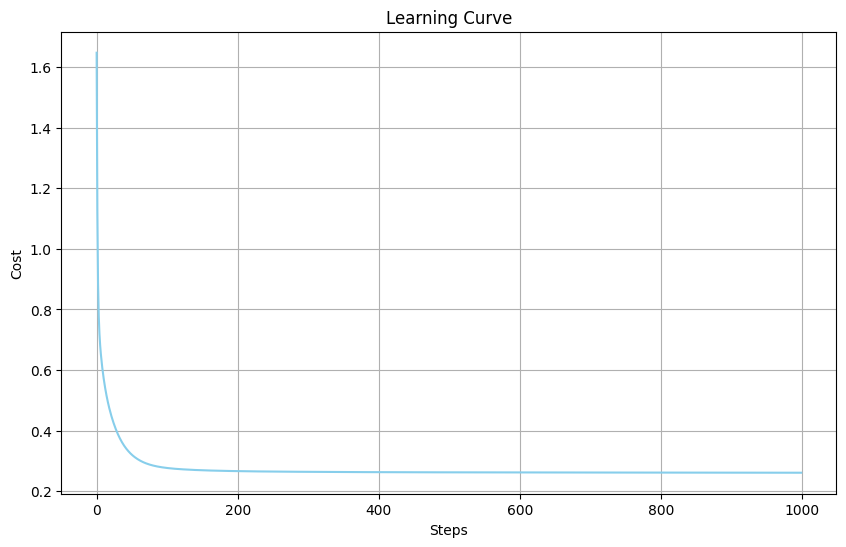

In [11]:
# learning curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_dev.costs_, color='skyblue')
plt.title("Learning Curve")
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

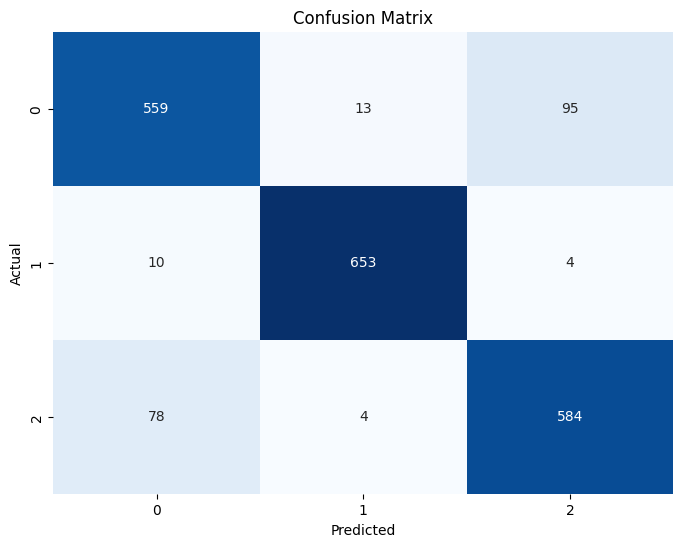

In [12]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = mlp_dev.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Aufgabe 3 (4 Punkte)

In den nächsten Aufgaben schauen wir uns das Innere des neuronalen Netzwerkes genauer an.

### Aufgabe 3a

Passe die Klasse `MLPClassifier` so an, dass die _activations_ / Outputs der Methode `forward()` von allen Modulen über das Optimisierungsverfahren abgespeichert werden. Speichere jeweils die _activations_ während jedem Step ab. Da Module lineare Transformationen und Aktivierungsfunktionen repräsentieren musst du die $A^{(l)}$ sowie $Z^{(l)}$ abspeichern.

Achtung: Aktiviere dieses Verhalten mit einem spezifischen Parameter in der `__init__` Methode, etwa `save_activations`. Damit kannst du die Speicherung deaktivieren wenn du die Klasse später verwendest und damit grösseren Speicherbedarf verhindern.

Visualisiere die Activations für die folgenden Modelle, trainiert auf dem Entwicklungsdatensatz (`dev_data.csv`).

Modell 1:

- Zwei Hidden Layers mit 10 und 20 Nodes
- Maximal 500 Steps
- Learning-Rate 0.1
- Regularisierung `alpha` 0


Modell 2:

- Zwei Hidden Layers mit 10 und 20 Nodes
- Maximal 500 Steps
- Learning-Rate 1
- Regularisierung `alpha` 0


Modell 3:

- Zwei Hidden Layers mit 10 und 20 Nodes
- Maximal 500 Steps
- Learning-Rate 0.1
- Regularisierung `alpha` 0.01


Visualisiere die _activations_ mit der Funktion `visualize_activations()`. Visualisiere die _activations_ in den folgenden Steps: `[0, 5, 100, 200, 300, 400]` und nur die _activations_ des zweiten Hidden-Layers **vor** der Aktivierungsfunktion, also $\mathbf{Z}^{(2)}$.

Du kannst die unten vorgegebenen Codes nach Belieben verwenden.

  0%|          | 0/500 [00:00<?, ?it/s]

MLPClassifier(activation_function=<class '__main__.ReluActivation'>, alpha=0,
              lr=0.1, max_num_steps=500, num_hidden_neurons=[10, 20],
              num_input_neurons=2, num_output_neurons=3, save_activations=True)

  0%|          | 0/500 [00:00<?, ?it/s]

MLPClassifier(activation_function=<class '__main__.ReluActivation'>, alpha=0,
              lr=1, max_num_steps=500, num_hidden_neurons=[10, 20],
              num_input_neurons=2, num_output_neurons=3, save_activations=True)

  0%|          | 0/500 [00:00<?, ?it/s]

MLPClassifier(activation_function=<class '__main__.ReluActivation'>, alpha=0.01,
              lr=0.1, max_num_steps=500, num_hidden_neurons=[10, 20],
              num_input_neurons=2, num_output_neurons=3, save_activations=True)

Model 1


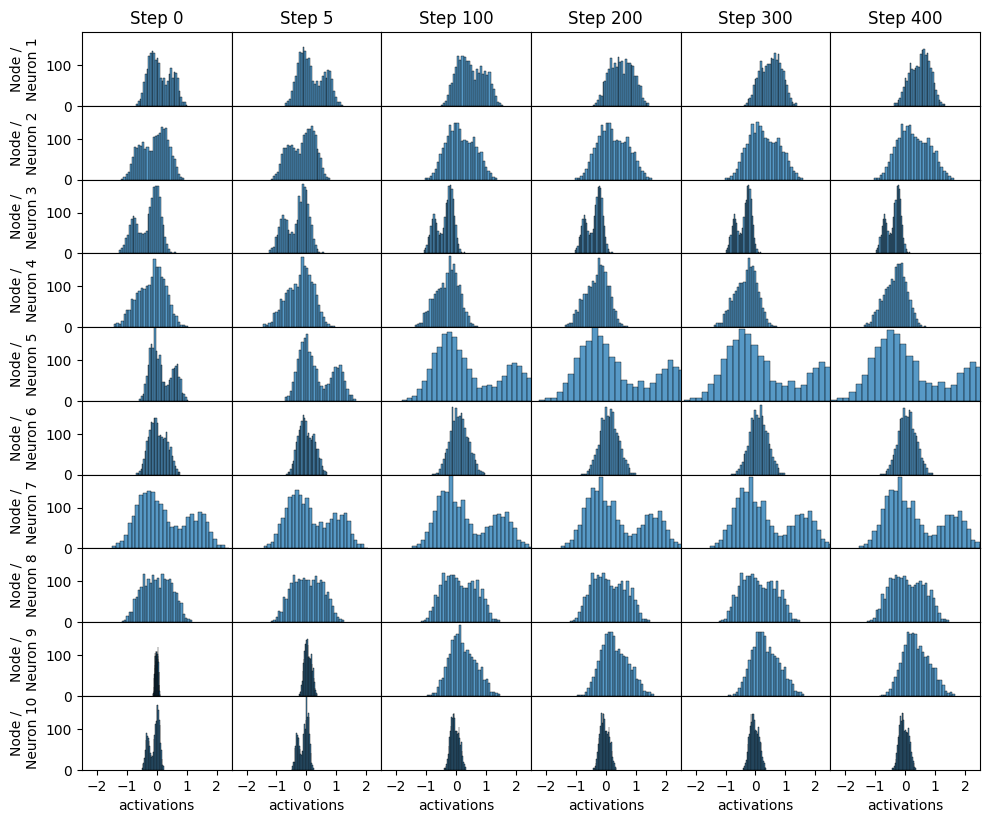

Model 2


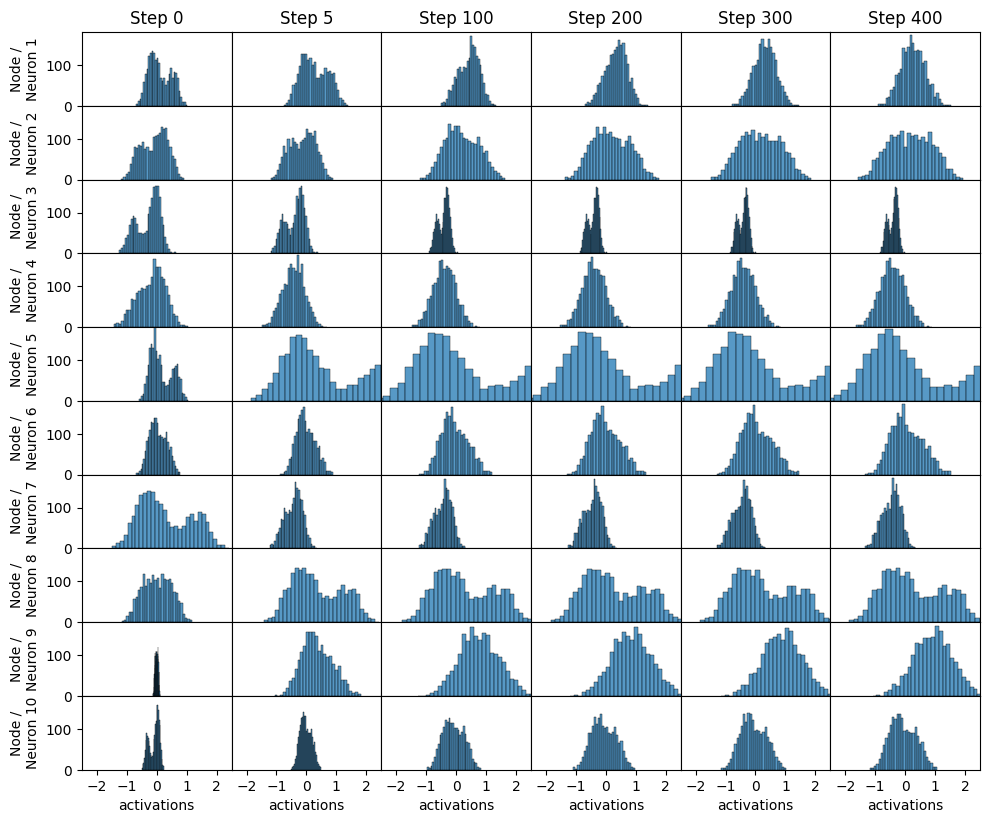

Model 3


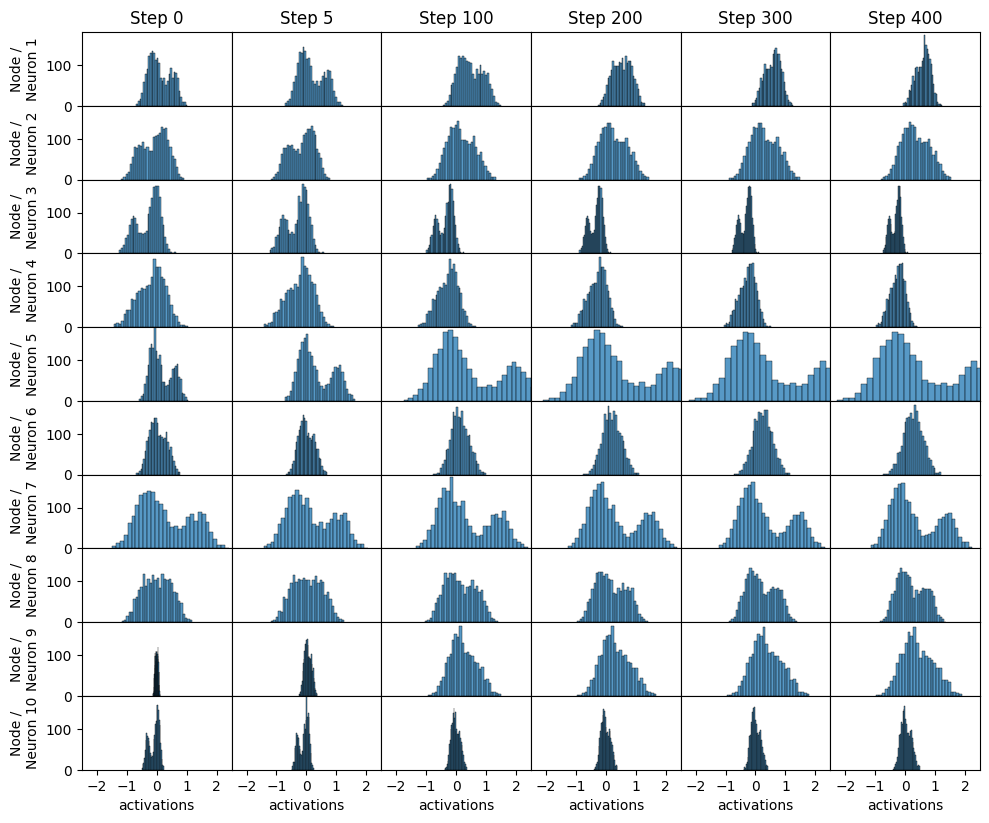

In [13]:
# Modell-Parameter
model_cfgs = [
    {'num_input_neurons': X.shape[1],
    'num_hidden_neurons': [10, 20],
    'num_output_neurons': 3,
    'activation_function': ReluActivation,
    'max_num_steps': 500,
    'lr': 0.1,
    'alpha': 0,
    'save_activations': True
    },
    {'num_input_neurons': X.shape[1],
    'num_hidden_neurons': [10, 20],
    'num_output_neurons': 3,
    'activation_function': ReluActivation,
    'max_num_steps': 500,
    'lr': 1,
    'alpha': 0,
    'save_activations': True
    },  
    {'num_input_neurons': X.shape[1],
    'num_hidden_neurons': [10, 20],
    'num_output_neurons': 3,
    'activation_function': ReluActivation,
    'max_num_steps': 500,
    'lr': 0.1,
    'alpha': 0.01,
    'save_activations': True
    }
]


def visualize_activations(
    activations_per_step: list[np.ndarray],
    steps_to_plot: list[int],
    max_nodes_to_plot: int | None=10,
    y_max=None) -> None:
    """Visualize Activations per Step and Node.
    
        Args:
          activations_per_step: list of activations, each list element has an (n, p) array,
              n is the number of observations, p is the number of nodes in a given module / layer
          steps_to_plot: list of indices to select entries in activations_per_step
          max_nodes_to_plot: max number of nodes to plot
    """
    
    n, p = activations_per_step[0].shape
    
    if max_nodes_to_plot is not None and p > max_nodes_to_plot:
        p = max_nodes_to_plot
    
    num_steps_to_plot = len(steps_to_plot)

    # Set up the matplotlib figure
    ratio = p / num_steps_to_plot
    width = 10
    height = width * ratio * 0.5

    fig, axes = plt.subplots(
        p, num_steps_to_plot, figsize=(width, height),
        gridspec_kw={'wspace':0, 'hspace':0})

    # Find the global maximum frequency to set a common y-axis scale
    max_frequency = np.max([
        np.histogram(activations_per_step[step][:, i], bins=30)[0].max()
        for step in steps_to_plot
        for i in range(p)
    ])

    # Iterate over each step
    for j, step in enumerate(steps_to_plot):
        data = activations_per_step[step]
            
        # Iterate over each node
        for i in range(0, p):
            _ = sns.histplot(data[:, i], bins=30, ax=axes[i, j], kde=False).set(
                xlim=(-2.5, 2.5), ylabel="", xticks=(-2, -1, 0, 1, 2), ylim=(0, max_frequency))

            # Title at top
            if i == 0:
                _ = axes[i, j].set_title(f'Step {step}')

            # Y-axis label at the leftmost figure
            if j == 0:
                _ = axes[i, j].set_ylabel(f'Node /\nNeuron {i+1}')
            else:  # Remove y-ticks for other figures
                _ = axes[i, j].set_yticks([])

            # X-axis label at the bottom
            if i == p-1:
                _ = axes[i, j].set_xlabel("activations")
            else:  # Remove x-ticks for other figures
                _ = axes[i, j].set_xticks([])

    # Adjust the layout
    plt.tight_layout()
    plt.show()
    
# Model Training
models = []
for cfg in model_cfgs:
    mlp = MLPClassifier(**cfg)
    mlp.fit(X, y)
    models.append(mlp)
    
# Visualize Activations
for i, mlp in enumerate(models):
    print(f"Model {i+1}")
    visualize_activations(mlp.activations, steps_to_plot=[0, 5, 100, 200, 300, 400], max_nodes_to_plot=10)

### Aufgabe 3b

Beantworte folgende Fragen:

- Vergleiche die _activations_ von Step 0 über alle Modelle hinweg. Was fällt auf? Warum ist das so?
- Vergleiche die _activations_ für die verschiedenen Neuronen für Modell 1. Beschreibe.
- Vergleiche die _activations_ von Modell 1 mit Modell 2. Was fällt auf? Warum ist das so?
- Vergleiche die _activations_ von Modell 1 mit Modell 3. Was fällt auf? Warum ist das so?

1. Am Anfang sind die Aktivierungen sehr ähnlich zueinander, da die Gewichte zufällig initialisiert sind und die Aktivierungen noch nicht durch das Training beeinflusst wurden.

2. Die Aktivierungen zeigen in Modell 1 unterschiedliche Dynamiken. Einige Neuronen behalten eine ähnliche Aktivierung über die Schritte hinweg, während andere Neuronen eine stärkere Veränderung zeigen. Insgesamt bleibt die Streuung der Verteilungen relativ moderat, was auf eine zurückhaltende Lernrate (0.1) und wenig Regularisierung (alpha=0) hindeutet. Durch die Relu Aktivierung entsteht eine asymmetrische Verteilung, da negative Werte auf 0 gesetzt werden.

3. Im Vergleich zu Modell 1 zeigen die Verteilungen in Modell 2 grössere Veränderungen über die Schritte hinweg. Die Erhöhung der Lernrate von 0.1 auf 1 bewirkt schnellere und stärkere Anpassungen der Gewichte, was zu drastischeren Veränderungen in den Aktivierungen führt.

4. Bei Modell 2 wurde das Alpha von 0 auf 0.01 erhöht, was zu einer stärkeren Regularisierung führt und die Anpassung der Gewichte begrenzt. Dies zeigt sich in den Aktivierungen, die im Vergleich zu Modell 1 weniger stark variieren und insgesamt spitzere und stabilere Verteilungen aufweisen.

## Aufgabe 4 (14 Punkte)

In dieser Aufgabe modellieren wir den Datensatz `./diagnose_train.csv` und suchen ein bestmögliches Modell.

### Aufgabe 4a

Wir möchten ein Modell finden, welches die beste _top-3 accuracy_ hat (siehe Einleitung).

Die _top-\(k\) accuracy_ ist folgendermassen definiert:

\begin{align}
\text{top-}k\text{ accuracy}(\mathbf{y}, f) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k} \mathbf{1}(f_{i,j} = y_i)
\end{align}

wobei $f_{i,j}$ die Vorhersage von $\mathbf{x}^{(i)}$, $y_i$ ist der wahre Wert und $j$ die $j$-grösste Vorhersage ist. Ist z.B. $j=2$ so entspricht dies derjenigen Klasse mit dem zweitgrössten Score / Wahrscheinlichkeit. $\mathbf{1}$ ist die Indikatorfunktion. Ist also die wahre Klasse innerhalb der top-k Vorhersagen so gilt das als Treffer.

Wir möchten aussserdem noch die _Precision_ und den _Recall_ für jede einzelne Klasse berechnen.

Implementiere folgende Funktionen:
- calculate_topk
- calculate_precision_and_recall

Implementiere deine eigenen Tests für die Funktionen. Erstelle dazu von Hand einen einfachen Datensatz und berechne die Werte der Metriken von Hand und vergleiche diese mit dem Output der Methoden. Es reicht ein Test-Case pro Metrik.

In [14]:
def calculate_topk(y_true: np.ndarray, y_pred: np.ndarray, k=3):
    """
    Calculate the top-k accuracy.

    Args:
        y_true (np.ndarray): True labels, shape (n_samples,)
        y_pred (np.ndarray): Predicted probabilities or scores, shape (n_samples, n_classes)
        k (int): The value of k for top-k accuracy

    Returns:
        float: The top-k accuracy
    """
    n_samples = y_true.shape[0]
    
    topk_preds = np.argsort(y_pred, axis=1)[:, -k:]
        
    matches = [y_true[i] in topk_preds[i] for i in range(n_samples)]
    
    topk_accuracy = np.mean(matches)
    return topk_accuracy



def calculate_precision_and_recall(y_true: np.ndarray, y_pred: np.ndarray, classes: list[str]):
    """
    Calculate the precision and recall for each class.

    Args:
        y_true (np.ndarray): True labels, shape (n_samples,)
        y_pred (np.ndarray): Predicted labels, shape (n_samples,)
        classes (list): List of class labels

    Returns:
        dict: Precision and Recall for each class
    """
    class_metrics = defaultdict(dict)

    for c in classes:
        true_positives = np.sum((y_true == c) & (y_pred == c))
        false_positives = np.sum((y_true != c) & (y_pred == c))
        false_negatives = np.sum((y_true == c) & (y_pred != c))

        # Handle division by zero
        precision = (
            true_positives / (true_positives + false_positives)
            if (true_positives + false_positives) > 0
            else 0.0
        )
        recall = (
            true_positives / (true_positives + false_negatives)
            if (true_positives + false_negatives) > 0
            else 0.0
        )

        class_metrics[c]['precision'] = precision
        class_metrics[c]['recall'] = recall

    return class_metrics




# now we test the functions
y_true_topk = np.array([0, 1, 2, 1, 0])
y_pred_topk = np.array([
    [0.6, 0.2, 0.2], 
    [0.1, 0.7, 0.2],  
    [0.2, 0.3, 0.5],  
    [0.4, 0.35, 0.25],
    [0.3, 0.4, 0.3]   
])

top_accuracy = calculate_topk(y_true_topk, y_pred_topk)
print(f"Top Accuracy: {top_accuracy:.4f}")

y_true_pr = np.array([0, 1, 2, 0, 0, 2, 1, 0])
y_pred_pr = np.array([0, 2, 2, 2, 0, 1, 1, 0])
classes_pr = [0, 1, 2]

precision_recall_results = calculate_precision_and_recall(y_true_pr, y_pred_pr, classes_pr)
print("\nPrecision and Recall per class:")
for cls in classes_pr:
    precision = precision_recall_results[cls]['precision']
    recall = precision_recall_results[cls]['recall']
    print(f"Class {cls}: Precision = {precision:.4f}, Recall = {recall:.4f}")

Top Accuracy: 1.0000

Precision and Recall per class:
Class 0: Precision = 1.0000, Recall = 0.7500
Class 1: Precision = 0.5000, Recall = 0.5000
Class 2: Precision = 0.3333, Recall = 0.5000


### Aufgabe 4b

Entwickle nun dein bestes Modell auf dem Trainings-Datensatz `./diagnose_train.csv`. Vergleiche mindestens 8 Modelle (zeige das!) und wähle das Beste aus. Die Modelle sollen sich sinnvoll voneinander unterscheiden. _Feature Engineering_ soll nicht angewendet werden.

Hinweis: In dieser Aufgabe geht es darum mehrere Modelle sinnvoll miteinander zu vergleichen. Ein ideales Instrument ist Kreuzvalidierung. Lese dazu die folgende Dokumentation: [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html). Verwende [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) um verschiedene Modelle miteinander zu vergleichen. Lese in der Dokumentation genau, wie das beste Modell ausgewählt wird.

Maximiere die top-3 Accuracy. Verwende dazu die von dir implementierte Funktion. Lies die Dokumentation zu 
[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) um zu erfahren, wie man eine eigene Metrik verwenden kann (statt `Accuracy`). Siehe auch das Objekt `gridcv_scorer` unten.

Beachte das Limit bezüglich der Gesamtlaufzeit des Notebooks.

Für das **beste Modell**:

- Berechne für jede Klasse `Recall` und `Precision` auf jeweils `./diagnose_train.csv` und `./diagnose_test.csv`. Berechne die Werte mit deiner eigenen Funktion. Stelle die Resultate als Grafik oder Tabelle (print von pd.DataFrame) dar.
- Berechne die top-3 Accuracy auf jeweils `./diagnose_train.csv` und `./diagnose_test.csv`.
- Plotte ausserdem die Confusion Matrix für den Trainings- und Test-Datensatz. Du darfst hier `sklearn.metrics.confusion_matrix` und `sklearn.metrics.ConfusionMatrixDisplay` verwenden.

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


TOPK = 3

def scoring_fn(y_true, y_score, k=TOPK):
    return calculate_topk(y_true, y_score, k=k)

gridcv_scorer = make_scorer(scoring_fn, greater_is_better=True, needs_proba=True)

data_train = pd.read_csv('diagnose_train.csv')
data_test = pd.read_csv('diagnose_test.csv')

X_train = data_train.drop(columns=['id', 'Diagnose']).values
y_train = data_train['Diagnose'].values

X_test = data_test.drop(columns=['id', 'Diagnose']).values
y_test = data_test['Diagnose'].values

grid = {
    'lr': [0.001, 0.01, 0.02],
    'alpha': [0.0, 0.001, 0.01, 0.1],
    'num_hidden_neurons': [[10, 10], [20, 20], [30, 30]],
    'theta_init_range': [(-0.1, 0.1), (-0.3, 0.3)]
}

# Label
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train))

mlp = MLPClassifier(
    num_input_neurons=X_train.shape[1],
    num_output_neurons=num_classes,
    num_hidden_neurons=[10, 20],
    activation_function=ReluActivation,
    max_num_steps=1000,
)

grid_search = GridSearchCV(mlp, grid, cv=5, scoring=gridcv_scorer)

# Training
grid_search.fit(X_train, y_train)
print("Bestes Modell:")
print(grid_search.best_params_)
print(f"Beste Top-3 Accuracy: {grid_search.best_score_:.4f}")

c:\Users\Michelle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation_function=<class '__main__.ReluActivation'>,
                                     num_hidden_neurons=[10, 20],
                                     num_input_neurons=64,
                                     num_output_neurons=11),
             param_grid={'alpha': [0.0, 0.001, 0.01, 0.1],
                         'lr': [0.001, 0.01, 0.02],
                         'num_hidden_neurons': [[10, 10], [20, 20], [30, 30]],
                         'theta_init_range': [(-0.1, 0.1), (-0.3, 0.3)]},
             scoring=make_scorer(scoring_fn, response_method='predict_proba'))

Bestes Modell:
{'alpha': 0.0, 'lr': 0.001, 'num_hidden_neurons': [10, 10], 'theta_init_range': (-0.1, 0.1)}
Beste Top-3 Accuracy: 0.3982


In [16]:
# Testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test)
top_accuracy = calculate_topk(y_test, y_pred)
print(f"Top-3 Accuracy auf Testdaten: {top_accuracy:.4f}")

Top-3 Accuracy auf Testdaten: 0.4577


In [17]:
# Precision und Recall
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Dekodieren der numerischen Labels in String-Labels
y_train_decoded = label_encoder.inverse_transform(y_train)
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Klassen-Labels
classes = label_encoder.classes_

# Berechnung von Precision und Recall
train_metrics = calculate_precision_and_recall(y_train_decoded, y_train_pred_decoded, classes)
train_df = pd.DataFrame(train_metrics).T
print("Precision und Recall auf Trainingsdaten:")
print(train_df)

test_metrics = calculate_precision_and_recall(y_test_decoded, y_test_pred_decoded, classes)
test_df = pd.DataFrame(test_metrics).T
print("Precision und Recall auf Testdaten:")
print(test_df)


Precision und Recall auf Trainingsdaten:
                       precision    recall
Chikungunya             0.369231  0.452830
Dengue                  0.125000  0.160000
Japanese_encephalitis   0.185185  0.230769
Lyme_disease            0.285714  0.238095
Malaria                 0.000000  0.000000
Plague                  0.086957  0.095238
Rift_Valley_fever       0.093023  0.071429
Tungiasis               0.316667  0.339286
West_Nile_fever         0.162162  0.176471
Yellow_Fever            0.183333  0.224490
Zika                    0.085714  0.065217
Precision und Recall auf Testdaten:
                       precision    recall
Chikungunya             0.400000  0.307692
Dengue                  0.062500  0.076923
Japanese_encephalitis   0.160000  0.250000
Lyme_disease            0.133333  0.200000
Malaria                 0.000000  0.000000
Plague                  0.100000  0.090909
Rift_Valley_fever       0.111111  0.071429
Tungiasis               0.461538  0.428571
West_Nile_fever     

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Training')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

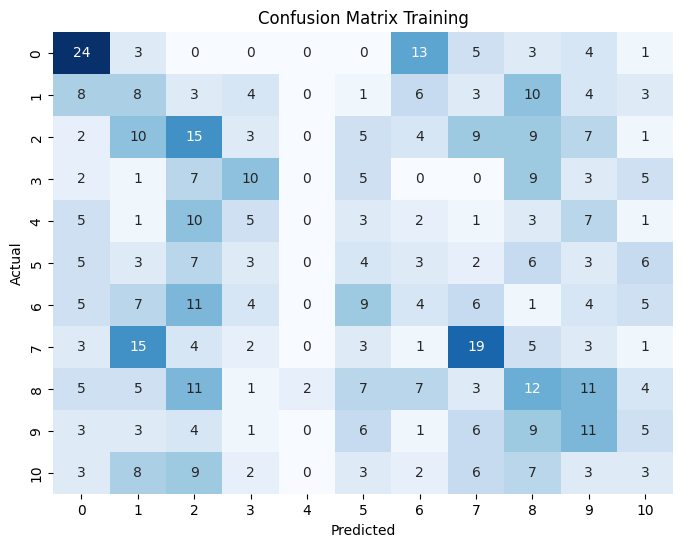

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Test')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

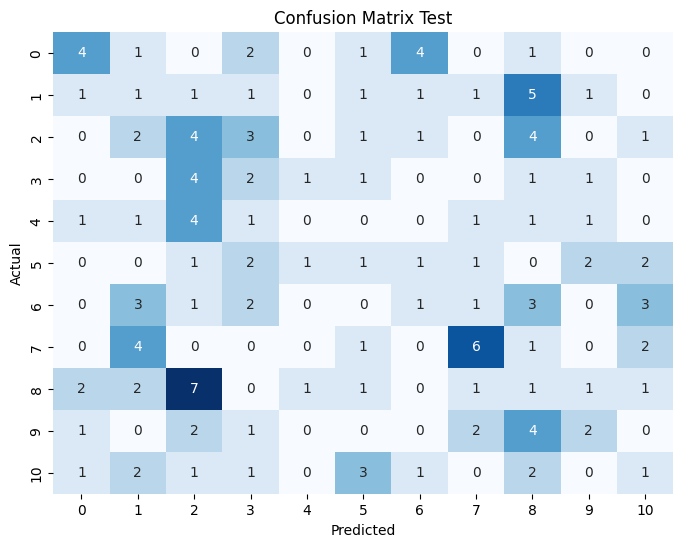

In [18]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Aufgabe 4c

Diskutiere die folgenden Punkte. Berücksichtige dabei das Ziel der Analyse, wie es in der Einleitung formuliert ist:

- Diskutiere das beste Modell: welche Faktoren / Hyper-Parameter sind wichtig?
- Diskutiere die erzielten Metriken und die Confusion Matrizen
- Was würdest du Mika kommunizieren bezüglich dem Erfolg der Modellierung? 
- Was würdest du Mika empfehlen was die nächsten Schritte für die Modellierung sein könnten? 

1. - alpha = 0: das Modell wird mit diesem Wert nicht Regularisiert, was bedeutet, dass die Gewichte nicht beschränkt werden und das Modell anfälliger für Overfitting ist.
   - learning_rate = 0.001: die Lernrate ist sehr klein, was bedeutet, dass das Modell langsam lernt und mehrere Schritte benötigt, um zu konvergieren.
   - hidden_layer_sizes = (10, 10): die Architektur des Modells beeinflusst die Kapazität des Modells und die Fähigkeit, die Daten zu modellieren. Ist die Anzahl der Hiiden Layers zu klein, kann das Modell zu einfach sein und die Daten nicht gut modellieren. Ist die Anzahl der Hidden Layers zu gross, kann das Modell zu komplex sein und die Daten überanpassen.
   - theta_init_range = (-0.1, 0.1): die Initialisierung der Gewichte ist wichtig, um das Modell zu stabilisieren und das Training zu beschleunigen. Dieser Wert ist also entscheidend für die Konvergenz des Modells.

2. - Precision und Recall: einige Diagnosen zeigen gute Precision- und Recall-Werte, während andere Diagnosen schlechter abschneiden. Dies beduetet, dass das Modell einige Diagnosen besser klassifizieren kann als andere, beziehungsweise, dass einige Diagnosehn sehr ähnliche Symptome aufweisen oder es zu wenige Datenpunkte gibt, um das Modell zu trainieren.
   - Confusion Matrix: die Confusion Matrix bestätigt die Annahmen der Precision und Recall-Werte. Einige Diagnosen werden häufiger falsch klassifiziert als andere, insebsondere bei den benachbarten Diagnosen gibt es häufig Fehleinordnungen.

3. Eine Top-3 Accuracy von 0.4577 ist schon ein guter Wert, jedoch werden einige Krankheiten sehr oft falsch klassifiziert. In Bezug auf schwerwiegenden Krankheiten ist es wichtig, dass das Modell eine hohe Genauigkeit aufweist, um die richtige Diagnose zu stellen. Das Modell muss also noch verbessert werden, um die Genauigkeit zu erhöhen.

4. Ich würde Mika empfehlen weiteren Daten zu sammeln, um das Modell zu verbessern und die verschiedenen Krankheiten besser unterscheiden zu können. Insbesondere bei den Diagnosen, die schlecht klassifiziert werden, könnten andere Datenpunkte helfen, das Modell zu trainieren. 

## Aufgabe 5 - Gewichtung der Loss-Funktion (6 Punkte)

In dieser Aufgabe ist es das Ziel das Modell stärker auf seltenere Krankheiten zu fokussieren.

Dazu modifizierst du die Berechnung der Loss-Funktion, sodass du den Loss für jede Klasse unterschiedlich gewichten kannst.

Die modifizierte Kostenfunktion sieht folgendermassen aus:

\begin{align}
J(\theta) &= \frac{1}{n}\sum_{i=1}^{n} \sum_{j=1}^{k} \Big(- w_j y_j^{(i)} \log \hat{y}_j^{(i)} \Big) + C \\
C &= \frac{\lambda}{2} \sum_{l=1}^{L} \sum_{i=1}^{u^{(l-1)}} \sum_{j=1}^{u^{(l)}} (\mathbf{W}^{(l)}_{ij})^2
\end{align}

Wobei der Vektor $\mathbf{w}$ pro Klasse ein Gewicht enthält. Der Eintrag $j$ von $\mathbf{w}$ enthält das Gewicht für die Klassse $j$.


### Aufgabe 5a

Modifiziere deine Implementation vom `MLPClassifier` um die Gewichtung konfigurieren zu können.

Trainiere ein neues Modell mit gewichtetem Loss. Verwende dazu die Architektur und die Parameter vom besten Modell aus Aufgabe 4.

Vergleiche die Leistung des Modells analog Aufgabe 4.

Du kannst dich bezüglich einer möglichen Gewichtung von hier inspirieren lassen: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html)

In [ ]:
# Modell trainieren
# Berechne die Klassenverteilung
class_counts = np.bincount(y_train) 
total_samples = len(y_train) 

# Klassen-Gewichte basierend auf inverser Häufigkeit
class_weights = total_samples / (len(class_counts) * class_counts)

print("Klassen-Gewichte:", class_weights)

Klassen-Gewichte: [0.08547004 0.09059824 0.06969095 0.10785505 0.11920821 0.10785505
 0.08089129 0.08089129 0.06661635 0.09244718 0.09847635]


In [33]:
grid_weights = {
    'lr': [0.001, 0.01, 0.02],
    'alpha': [0.0, 0.001, 0.01, 0.1],
    'num_hidden_neurons': [[10, 10], [20, 20], [30, 30]],
    'theta_init_range': [(-0.1, 0.1), (-0.3, 0.3)]
}

mlp_weights = MLPClassifier(
    num_input_neurons=X_train.shape[1],
    num_output_neurons=num_classes,
    num_hidden_neurons=[10, 20],
    activation_function=ReluActivation,
    class_weights=class_weights,
    max_num_steps=1000,
)

grid_search_weights = GridSearchCV(mlp_weights, grid_weights, cv=5, scoring=gridcv_scorer)

# Training
grid_search_weights.fit(X_train, y_train)
print("Bestes Modell:")
print(grid_search_weights.best_params_)
print(f"Beste Top-3 Accuracy: {grid_search_weights.best_score_:.4f}")
print("Klassen-Gewichte:", class_weights)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation_function=<class '__main__.ReluActivation'>,
                                     num_hidden_neurons=[10, 20],
                                     num_input_neurons=64,
                                     num_output_neurons=11),
             param_grid={'alpha': [0.0, 0.001, 0.01, 0.1],
                         'lr': [0.001, 0.01, 0.02],
                         'num_hidden_neurons': [[10, 10], [20, 20], [30, 30]],
                         'theta_init_range': [(-0.1, 0.1), (-0.3, 0.3)]},
             scoring=make_scorer(scoring_fn, response_method='predict_proba'))

Bestes Modell:
{'alpha': 0.0, 'lr': 0.001, 'num_hidden_neurons': [10, 10], 'theta_init_range': (-0.1, 0.1)}
Beste Top-3 Accuracy: 0.3982
Klassen-Gewichte: [0.08547004 0.09059824 0.06969095 0.10785505 0.11920821 0.10785505
 0.08089129 0.08089129 0.06661635 0.09244718 0.09847635]


In [21]:
# Testing
best_model_weights = grid_search_weights.best_estimator_
y_pred = best_model_weights.predict_proba(X_test)
top_accuracy = calculate_topk(y_test, y_pred)
print(f"Top-3 Accuracy auf Testdaten: {top_accuracy:.4f}")

Top-3 Accuracy auf Testdaten: 0.4577


In [22]:
# Recall und Precision
y_train_decoded = label_encoder.inverse_transform(y_train)
y_train_pred_decoded = label_encoder.inverse_transform(best_model.predict(X_train))

y_test_decoded = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(best_model.predict(X_test))

# Berechnung von Precision und Recall
train_metrics = calculate_precision_and_recall(y_train_decoded, y_train_pred_decoded, label_encoder.classes_)
test_metrics = calculate_precision_and_recall(y_test_decoded, y_test_pred_decoded, label_encoder.classes_)

train_df = pd.DataFrame(train_metrics).T
test_df = pd.DataFrame(test_metrics).T

# Ausgabe der Precision und Recall
print("\nPrecision und Recall auf Trainingsdaten:")
print(train_df)

print("\nPrecision und Recall auf Testdaten:")
print(test_df)


Precision und Recall auf Trainingsdaten:
                       precision    recall
Chikungunya             0.369231  0.452830
Dengue                  0.125000  0.160000
Japanese_encephalitis   0.185185  0.230769
Lyme_disease            0.285714  0.238095
Malaria                 0.000000  0.000000
Plague                  0.086957  0.095238
Rift_Valley_fever       0.093023  0.071429
Tungiasis               0.316667  0.339286
West_Nile_fever         0.162162  0.176471
Yellow_Fever            0.183333  0.224490
Zika                    0.085714  0.065217

Precision und Recall auf Testdaten:
                       precision    recall
Chikungunya             0.400000  0.307692
Dengue                  0.062500  0.076923
Japanese_encephalitis   0.160000  0.250000
Lyme_disease            0.133333  0.200000
Malaria                 0.000000  0.000000
Plague                  0.100000  0.090909
Rift_Valley_fever       0.111111  0.071429
Tungiasis               0.461538  0.428571
West_Nile_fever   

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Training')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

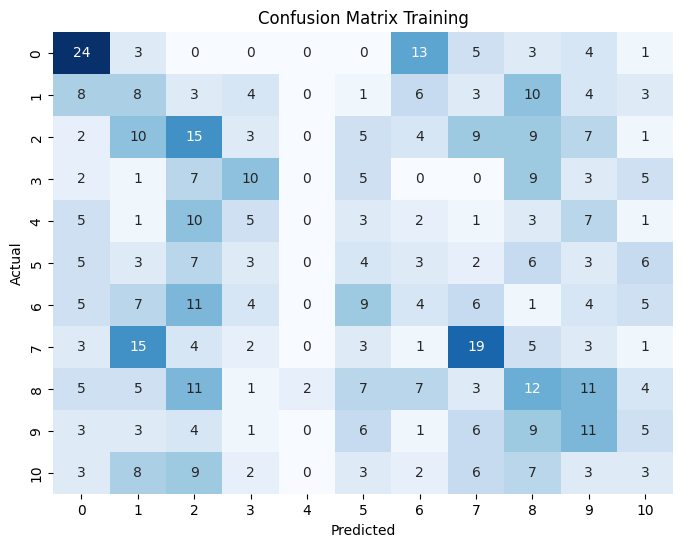

In [23]:
# Confusion Matrix Train
cm_train = confusion_matrix(y_train, best_model_weights.predict(X_train))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Test')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

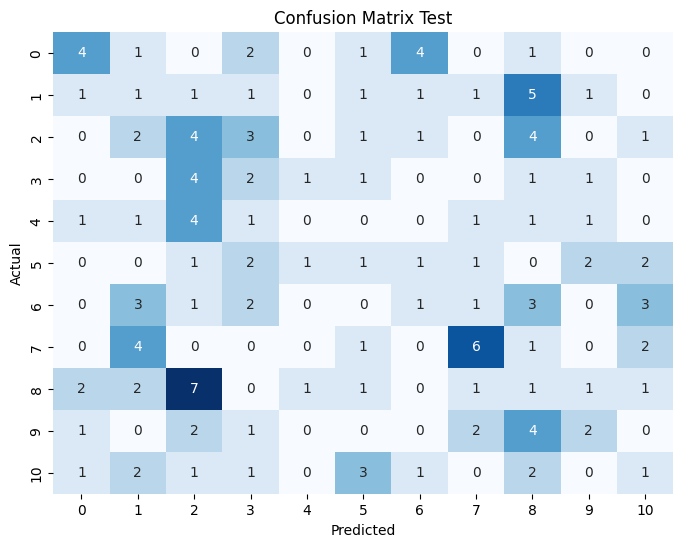

In [24]:
# Confusion Matrix Test
cm_test = confusion_matrix(y_test, best_model_weights.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Diskutiere die beobachteten Unterschiede. Ist die Änderung sinnvoll? Warum ja / nein?

Mit der Veränedrung, dass jede Klasse anders gewichtet wird, soll das Modell stärker auf die seltenen Krankheiten fokussiert werden. Da die gewichtung der Klassen sich aber nicht signifikant unterscheiden, ist hier keine Veränderung des Modells sichtbar. Die Klassen zu gewichten ist immer dann sinvoll, wenn die Klassen sehr ungleich verteilt sind und das Modell dazu neigt, die häufigen Klassen besser zu klassifizieren als die seltenen Klassen. In diesem Fall ist die Gewichtung der Klassen nicht sinnvoll, da die Klassen relativ gleich verteilt sind und das Modell keine Tendenz zeigt, die häufigen Klassen besser zu klassifizieren als die seltenen Klassen.

## Aufgabe 6 - Decision Tree (7 Punkte)

Nun verwenden wir einen Decision Tree zur Vorhersage der Diagnose.

### Aufgabe 6a

- Warum sind Decision Trees interessante Modelle? Speziell auch in diesem Anwendungsfall?
- Welche Hyperparameter gilt es einzustellen bei der Verwendung von Decision Trees?

1. Decision Trees sind interessante Modelle, da sie einfach zu interpretieren sind und die Entscheidungsfindung transparent machen. Dies ist besonders wichtig, wenn es darum geht, die Diagnose einer Krankheit zu stellen, da die Entscheidung nachvollziehbar sein muss. Ausserdem können Decision Trees auch mit kategorischen Variablen umgehen, was in diesem Anwendungsfall wichtig ist, da die Symptome binär sind.

2. Die wichtigsten Hyperparameter sind:
   - max_depth: die maximale Tiefe des Baumes, um Overfitting zu vermeiden.
   - min_samples_split: die minimale Anzahl von Datenpunkten, die für einen Split erforderlich sind, um Overfitting zu vermeiden.
   - min_samples_leaf: die minimale Anzahl von Datenpunkten, die in einem Blattknoten sein müssen, um Overfitting zu vermeiden.
   - criterion: die Funktion, die verwendet wird, um die Qualität eines Splits zu bewerten, z.B. Gini oder Entropy.

### Aufgabe 6b

Finde nun ein bestmögliches Decision Tree-Modell zur Vorhersage der Diagnose, evaluiere dieses und vergleiche es mit den besten Modellen aus den vorhergehenden Aufgaben.

In [25]:
# Decision Tree-Modell
from sklearn.tree import DecisionTreeClassifier

# Definiere den Parameterraum
param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5], 
}

# Initialisiere den DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search_dt = GridSearchCV(
    dt_model,
    param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Führe die Grid-Search durch
grid_search_dt.fit(X_train, y_train)

# Bestes Modell und Parameter ausgeben
print("Bestes Modell:", grid_search_dt.best_estimator_)
print("Beste Parameter:", grid_search_dt.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

Bestes Modell: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)
Beste Parameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [26]:
from sklearn.metrics import classification_report

# Bestes Modell
best_dt_model = grid_search_dt.best_estimator_

# Vorhersagen auf Trainings- und Testdaten
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Precision, Recall und F1-Score
print("\nKlassifikationsbericht (Trainingsdaten):")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("\nKlassifikationsbericht (Testdaten):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))



Klassifikationsbericht (Trainingsdaten):
                       precision    recall  f1-score   support

          Chikungunya       0.61      0.87      0.71        53
               Dengue       0.37      0.54      0.44        50
Japanese_encephalitis       0.42      0.20      0.27        65
         Lyme_disease       0.52      0.55      0.53        42
              Malaria       0.37      0.58      0.45        38
               Plague       0.27      0.07      0.11        42
    Rift_Valley_fever       0.33      0.27      0.30        56
            Tungiasis       0.71      0.52      0.60        56
      West_Nile_fever       0.39      0.24      0.29        68
         Yellow_Fever       0.25      0.59      0.35        49
                 Zika       0.36      0.22      0.27        46

             accuracy                           0.41       565
            macro avg       0.42      0.42      0.39       565
         weighted avg       0.42      0.41      0.39       565


Klassifik

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Test')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

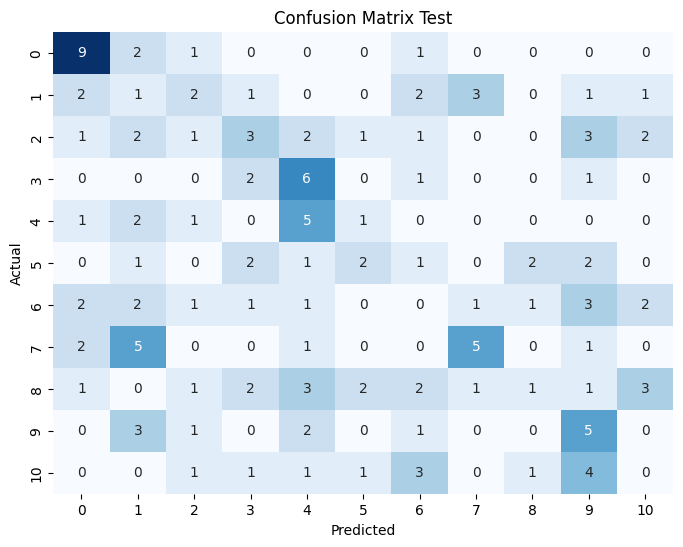

In [27]:
# Confusion Matrix Test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Mit dem besten Modell des Decision Trees erziele ich eine accuracy von 0.22 auf den Testdaten. Im Vergleich zu der Accuracy von 0.41 bei den Trainingsdaten ist das Modell also nicht gut und es eutet darauf hin, dass das Modell Overfitting aufweist.

## Aufgabe 7 - Tree Ensemble (9 Punkte)

Decision Trees sind 'weak learners'. Oft werden sie in Ensembles kombiniert, um die ihre Schwächen zu kompensieren.

### Aufgabe 7a

- Welche Schwächen werden oben angesprochen?
- Welche Ensemble-Ansätze für Decision Trees kennst du? Wie funktionieren sie?

1. Die Schwächen eines Decision Tree Modells sind Overfitting, da das Modell sehr komplex werden kann und sich dadurch zu sehr an die Trainingsdaten anpasst. Ausserdem sind sie empfindlich gegenüber kleinen Änderungen in den Daten, da sich der Baum stark verändern kann.

2. Die bekanntesten Ensemble-Ansätze sind:
   - Bagging: mehrere Bäume werden auf zufälligen Teilmengen der Daten trainiert und die Vorhersagen werden gemittelt.
   - Random Forest: eine spezielle Form von Bagging, bei der die Bäume auf zufälligen Teilmengen der Daten und zufälligen Teilmengen der Features trainiert werden.
   - Boosting: Bäume werden sequentiell trainiert und die Fehler des vorherigen Baumes werden korrigiert. Die Vorhersagen der Bäume werden gewichtet und gemittelt.

### Aufgabe 7b

Wähle einen Ensemble-Ansatz aus, und finde dafür ein bestmögliches Modell für unseren Datensatz. Evaluiere dein Modell und vergleiche es mit den vorhergehenden Modellen.

In [ ]:
# Ensemble-Modell (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Definiere den Parameterraum
param_grid = {
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy"], 
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5], 
}

# Initialisiere den RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(
    rf_model,
    param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1, # Berechne parallel, geht schneller
    verbose=1
)

# Führe die Grid-Search durch
grid_search_rf.fit(X_train, y_train)

# Bestes Modell und Parameter ausgeben
print("Bestes Modell:", grid_search_rf.best_estimator_)
print("Beste Parameter:", grid_search_rf.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

Bestes Modell: RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)
Beste Parameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# bestes Modell
best_rf_model = grid_search_rf.best_estimator_

# Vorhersagen auf Trainings- und Testdaten
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Precision, Recall und F1-Score
print("\nKlassifikationsbericht (Trainingsdaten):")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("\nKlassifikationsbericht (Testdaten):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Klassifikationsbericht (Trainingsdaten):
                       precision    recall  f1-score   support

          Chikungunya       0.78      1.00      0.88        53
               Dengue       1.00      0.84      0.91        50
Japanese_encephalitis       1.00      0.97      0.98        65
         Lyme_disease       1.00      1.00      1.00        42
              Malaria       1.00      1.00      1.00        38
               Plague       1.00      0.95      0.98        42
    Rift_Valley_fever       1.00      0.98      0.99        56
            Tungiasis       1.00      1.00      1.00        56
      West_Nile_fever       1.00      0.97      0.99        68
         Yellow_Fever       1.00      1.00      1.00        49
                 Zika       1.00      1.00      1.00        46

             accuracy                           0.97       565
            macro avg       0.98      0.97      0.98       565
         weighted avg       0.98      0.97      0.97       565


Klassifik

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Test')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

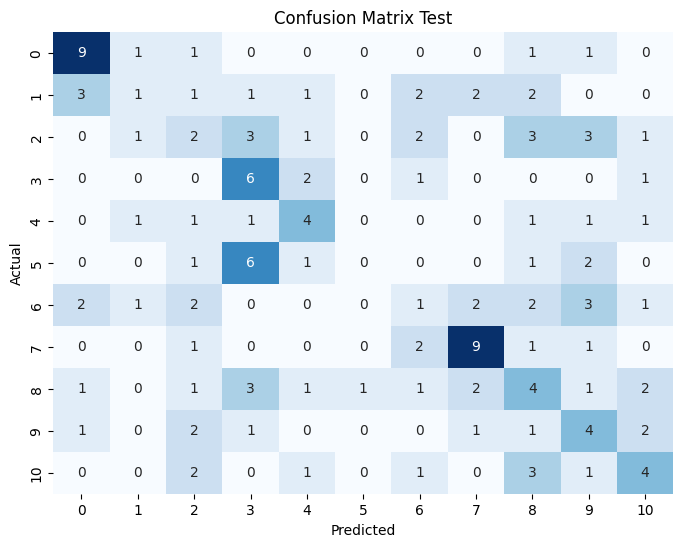

In [30]:
# Confusion Matrix Test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Ich habe mich für den Random Forest Ansatz entschieden, da dieser Ansatz sehr gut mit kategorischen Variablen umgehen kann und robust gegenüber Overfitting ist. Mit den Trainingsdaten erreiche ich hier eine Accuracy von 0.97 und auf den Testdaten 0.31. Das Modell zeigt also immer noch ein deutliches Overfitiing, jedoch lernt das Modell etwas besser als mit dem Decision Tree Modell.